## Imports

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

## Read in the data

In [4]:
df = pd.read_csv('/Users/cdcoonce/Documents/GitHub/Sleep_Deprivation/data/sleep_deprivation_dataset_detailed.csv')

df.head()

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14


In [5]:
df.describe()

,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.0000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,5.805500,8.316667,12.000000,3.245000,75.005833,38.1500,332.539000,29.516667,27.329333,2.383333,4.116667,17.866667
std,1.832357,5.637320,7.577845,0.827368,13.671457,17.1334,87.800288,8.168753,4.541382,1.688362,3.108717,11.015346
min,3.120000,0.000000,0.000000,1.600000,50.900000,10.0000,201.560000,18.000000,18.740000,0.000000,0.000000,0.000000
25%,4.107500,4.000000,6.000000,2.595000,64.620000,25.0000,257.535000,21.750000,23.580000,1.000000,1.000000,8.750000
50%,5.690000,8.000000,11.500000,3.260000,74.270000,37.0000,327.210000,28.500000,27.365000,2.500000,4.000000,17.500000
75%,7.285000,13.000000,19.000000,3.965000,85.600000,54.2500,402.845000,36.000000,30.747500,4.000000,6.000000,26.250000
max,8.820000,20.000000,24.000000,4.490000,99.730000,67.0000,494.550000,43.000000,34.930000,5.000000,10.000000,40.000000


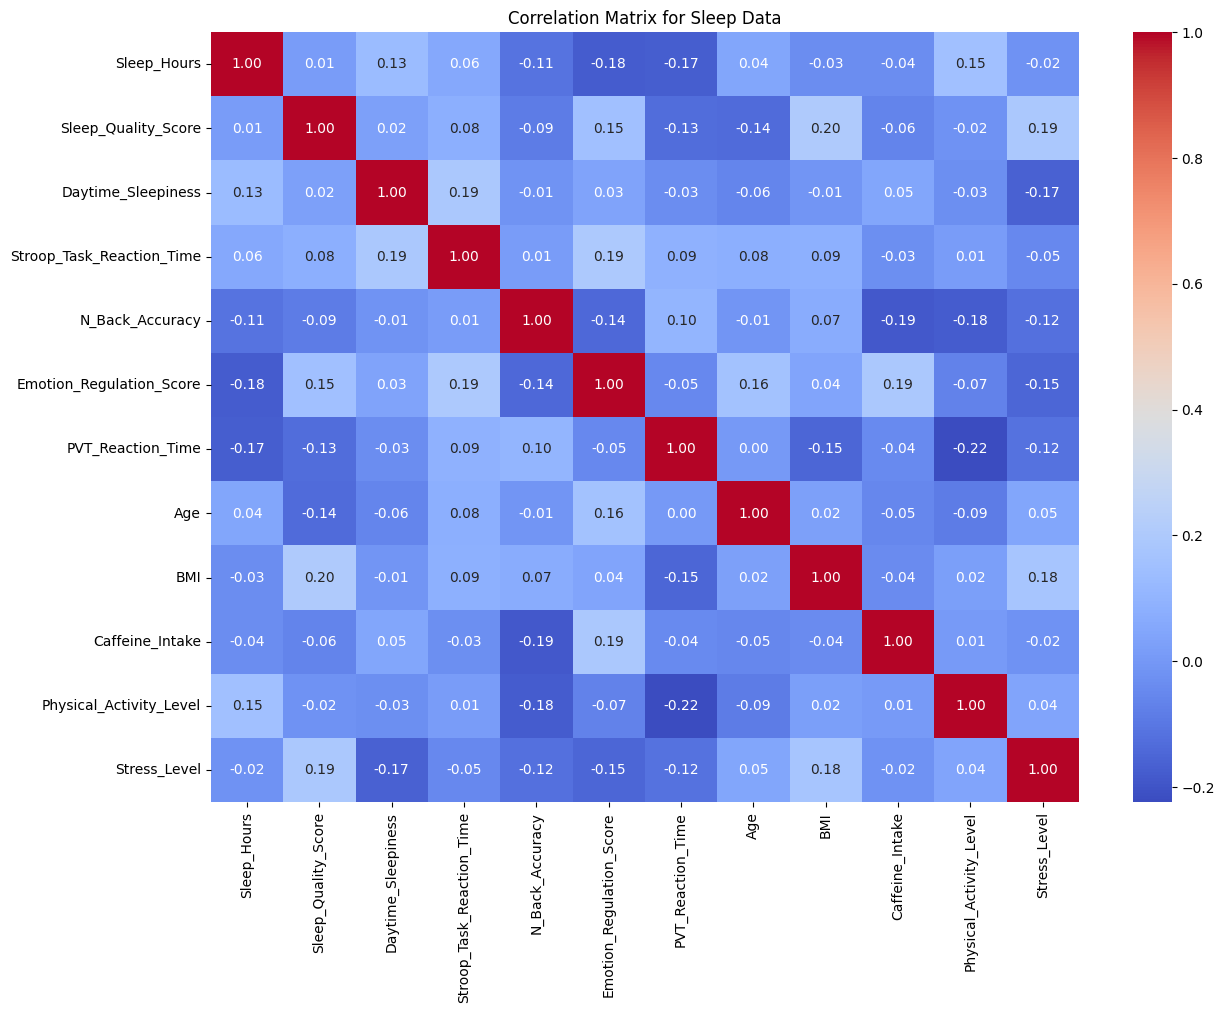

In [7]:
# Compute and visualize the correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Sleep Data")
plt.show()

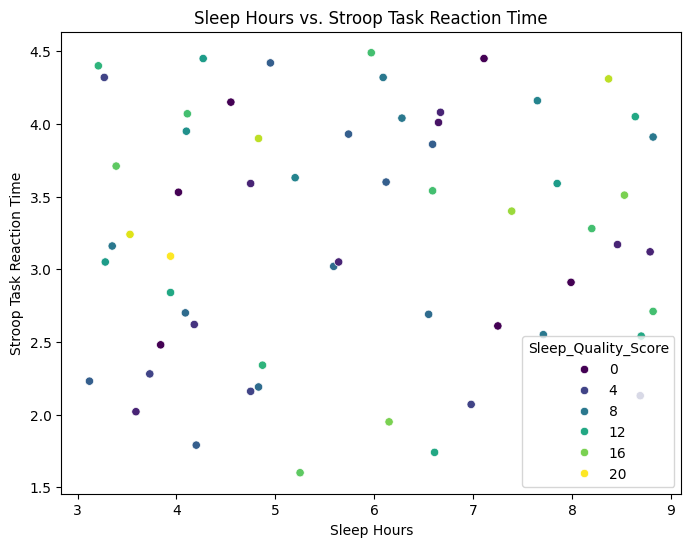

In [12]:
# Scatter Plot: Sleep Hours vs. Stroop Task Reaction Time
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep_Hours', y='Stroop_Task_Reaction_Time', hue='Sleep_Quality_Score', data=df, palette='viridis')
plt.title("Sleep Hours vs. Stroop Task Reaction Time")
plt.xlabel("Sleep Hours")
plt.ylabel("Stroop Task Reaction Time")
plt.show()

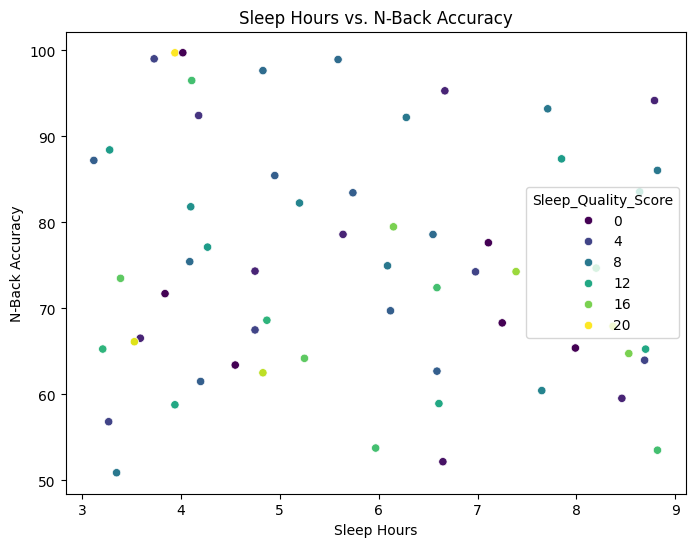

In [13]:
# Scatter Plot: Sleep Hours vs. N-Back Accuracy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep_Hours', y='N_Back_Accuracy', hue='Sleep_Quality_Score', data=df, palette='viridis')
plt.title("Sleep Hours vs. N-Back Accuracy")
plt.xlabel("Sleep Hours")
plt.ylabel("N-Back Accuracy")
plt.show()

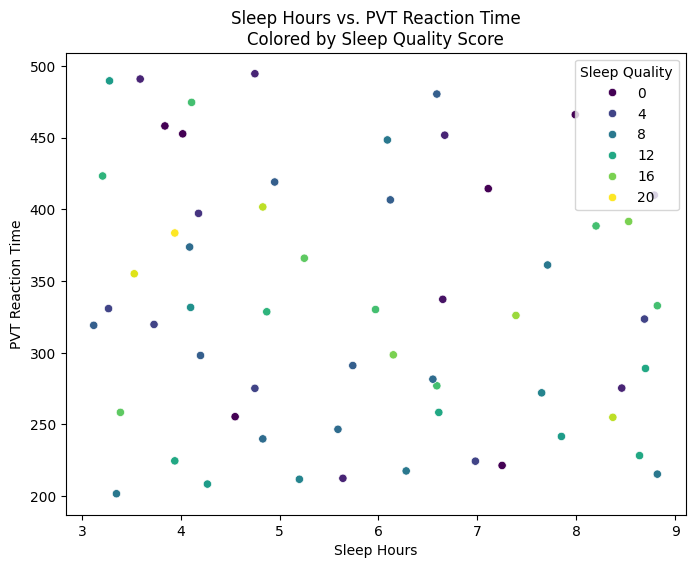

In [10]:
# Scatter Plot with a Hue: Sleep Hours vs. PVT Reaction Time, colored by Sleep Quality Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep_Hours', y='PVT_Reaction_Time', hue='Sleep_Quality_Score', data=df, palette='viridis')
plt.title("Sleep Hours vs. PVT Reaction Time\nColored by Sleep Quality Score")
plt.xlabel("Sleep Hours")
plt.ylabel("PVT Reaction Time")
plt.legend(title="Sleep Quality")
plt.show()

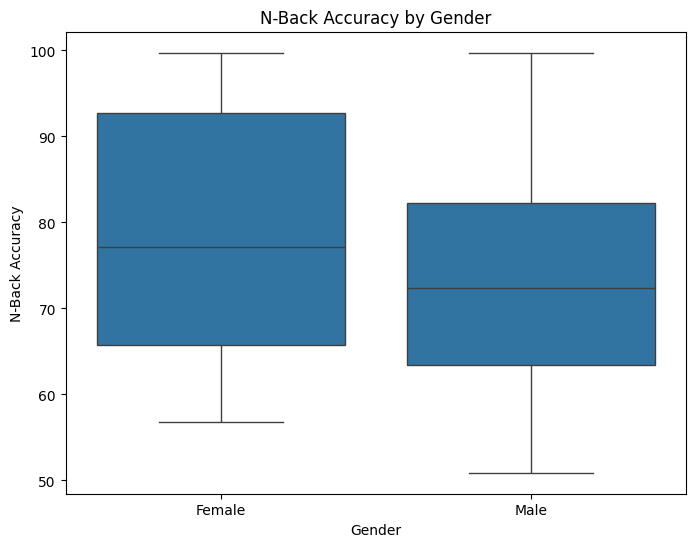

In [14]:
# Box Plot: N-Back Accuracy by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='N_Back_Accuracy', data=df)
plt.title("N-Back Accuracy by Gender")
plt.xlabel("Gender")
plt.ylabel("N-Back Accuracy")
plt.show()

### Split into Stress Subgroups

In [15]:
# Create stress subgroups using the median
stress_median = df['Stress_Level'].median()
df['Stress_Group'] = df['Stress_Level'].apply(lambda x: 'Low Stress' if x < stress_median else 'High Stress')

# Check the distribution of stress groups
print(df['Stress_Group'].value_counts())

Stress_Group
High Stress    30
Low Stress     30
Name: count, dtype: int64


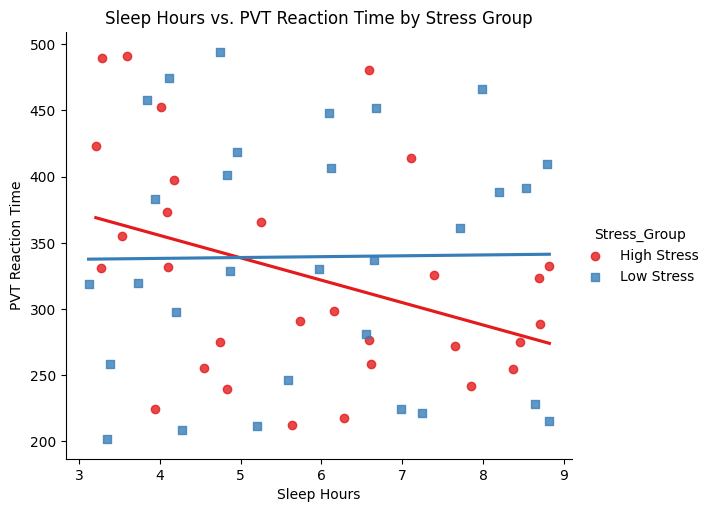

In [64]:
# Scatter plot with regression lines for each stress subgroup
sns.lmplot(x="Sleep_Hours", y="PVT_Reaction_Time", hue="Stress_Group",
           data=df, aspect=1.2, ci=None, markers=["o", "s"],
           palette="Set1")
plt.title("Sleep Hours vs. PVT Reaction Time by Stress Group")
plt.xlabel("Sleep Hours")
plt.ylabel("PVT Reaction Time")
plt.show()

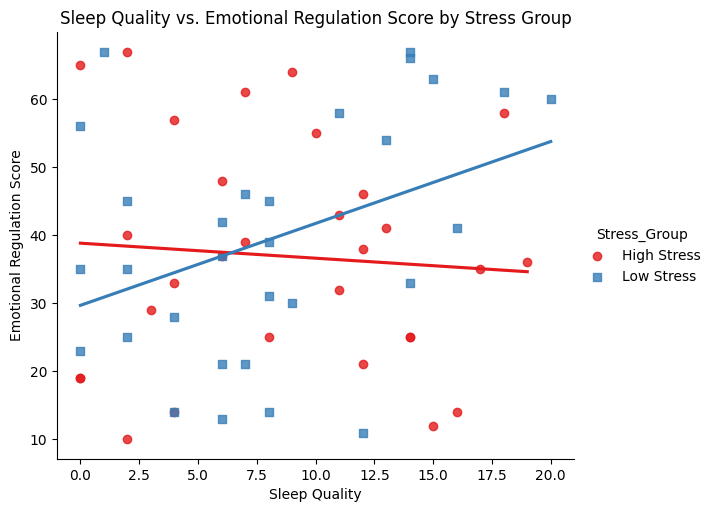

In [66]:
sns.lmplot(x="Sleep_Quality_Score", y='Emotion_Regulation_Score', hue='Stress_Group',
           data=df, aspect=1.2, ci=None, markers=["o", "s"],
           palette="Set1")
plt.title("Sleep Quality vs. Emotional Regulation Score by Stress Group")
plt.xlabel("Sleep Quality")
plt.ylabel("Emotional Regulation Score")
plt.show()

In [17]:
# Group the data by Stress_Group and compute correlation
grouped = df.groupby('Stress_Group')
for name, group in grouped:
    print(f"Correlation in {name} group:")
    print(group[['Sleep_Hours', 'PVT_Reaction_Time']].corr(), "\n")

Correlation in High Stress group:
                   Sleep_Hours  PVT_Reaction_Time
Sleep_Hours            1.00000           -0.38338
PVT_Reaction_Time     -0.38338            1.00000 

Correlation in Low Stress group:
                   Sleep_Hours  PVT_Reaction_Time
Sleep_Hours           1.000000           0.012702
PVT_Reaction_Time     0.012702           1.000000 



In [72]:
grouped = df.groupby('Stress_Group')
for name, group in grouped:
    print(f"Correlation in {name} group:")
    print(group[['Sleep_Quality_Score', 'Emotion_Regulation_Score']].corr(), "\n")

Correlation in High Stress group:
                          Sleep_Quality_Score  Emotion_Regulation_Score
Sleep_Quality_Score                  1.000000                 -0.074957
Emotion_Regulation_Score            -0.074957                  1.000000 

Correlation in Low Stress group:
                          Sleep_Quality_Score  Emotion_Regulation_Score
Sleep_Quality_Score                  1.000000                  0.384946
Emotion_Regulation_Score             0.384946                  1.000000 



### Split into Sleep Quality Subgroups

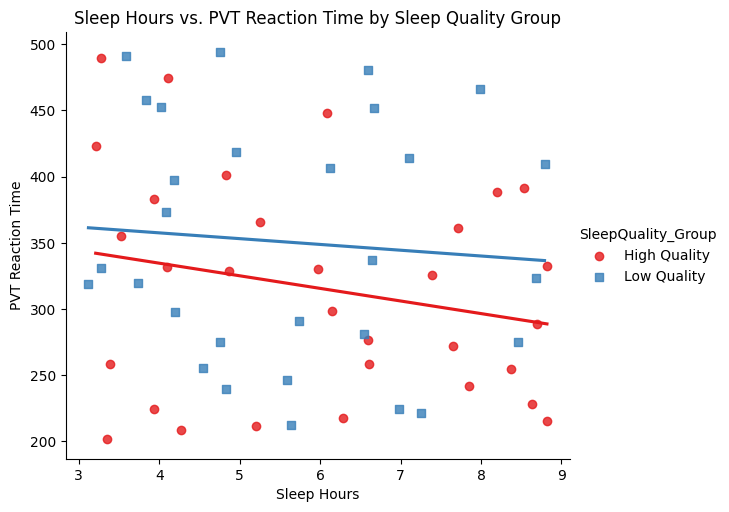

In [60]:
# Create sleep quality subgroups using a median split
quality_median = df['Sleep_Quality_Score'].median()
df['SleepQuality_Group'] = df['Sleep_Quality_Score'].apply(
    lambda x: 'Low Quality' if x < quality_median else 'High Quality'
)

sns.lmplot(x="Sleep_Hours", y="PVT_Reaction_Time", hue='SleepQuality_Group',
           data=df, aspect=1.2, ci=None, markers=["o", "s"],
           palette="Set1")
plt.title("Sleep Hours vs. PVT Reaction Time by Sleep Quality Group")
plt.xlabel("Sleep Hours")
plt.ylabel("PVT Reaction Time")
plt.show()

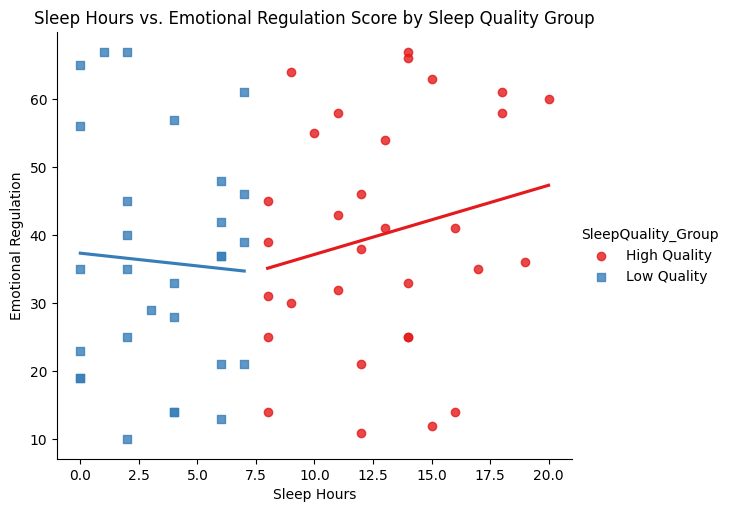

In [ ]:
sns.lmplot(x="Sleep_Quality_Score", y="Emotion_Regulation_Score", hue='SleepQuality_Group',
           data=df, aspect=1.2, ci=None, markers=["o", "s"],
           palette="Set1")
plt.title("Sleep Hours vs. Emotional Regulation Score by Sleep Quality Group")
plt.xlabel("Sleep Hours")
plt.ylabel("Emotional Regulation")
plt.show()

### Split BMI into Subgroups

In [ ]:
# Create BMI subgroups using the median
BMI_median = df['BMI'].median()
df['BMI_Group'] = df['BMI'].apply(lambda x: 'Low BMI' if x < BMI_median else 'High BMI')

# Check the distribution of BMI groups
print(df['BMI_Group'].value_counts())

BMI_Group
High BMI    30
Low BMI     30
Name: count, dtype: int64


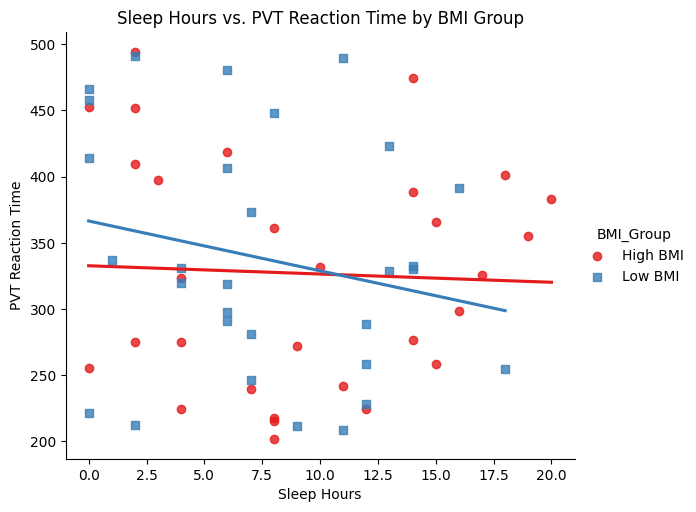

In [50]:
sns.lmplot(x="Sleep_Quality_Score", y="PVT_Reaction_Time", hue="BMI_Group",
           data=df, aspect=1.2, ci=None, markers=["o", "s"],
           palette="Set1")
plt.title("Sleep Hours vs. PVT Reaction Time by BMI Group")
plt.xlabel("Sleep Hours")
plt.ylabel("PVT Reaction Time")
plt.show()

### Split Physical Activity into Subgroups

In [52]:
# Create PAL subgroups using the median
PAL_median = df['Physical_Activity_Level'].median()
df['PAL_Group'] = df['Physical_Activity_Level'].apply(lambda x: 'Low PAL' if x < PAL_median else 'High PAL')

# Check the distribution of PAL groups
print(df['PAL_Group'].value_counts())

PAL_Group
High PAL    36
Low PAL     24
Name: count, dtype: int64


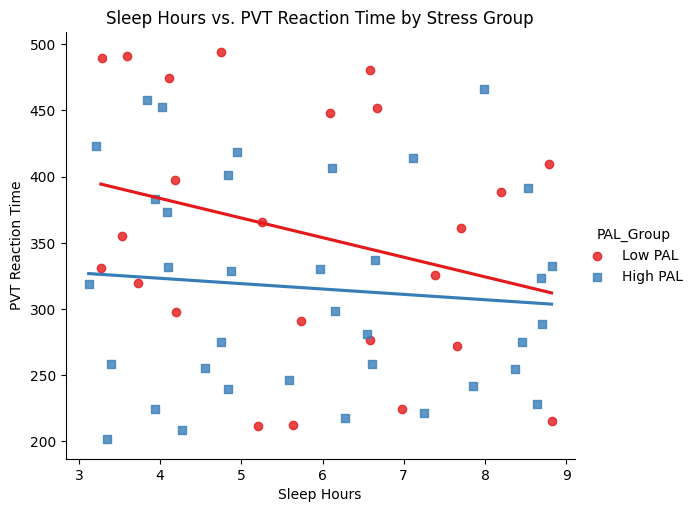

In [ ]:
sns.lmplot(x="Sleep_Hours", y="PVT_Reaction_Time", hue="PAL_Group",
           data=df, aspect=1.2, ci=None, markers=["o", "s"],
           palette="Set1")
plt.title("Sleep Hours vs. PVT Reaction Time by Physical Activity Group")
plt.xlabel("Sleep Hours")
plt.ylabel("PVT Reaction Time")
plt.show()

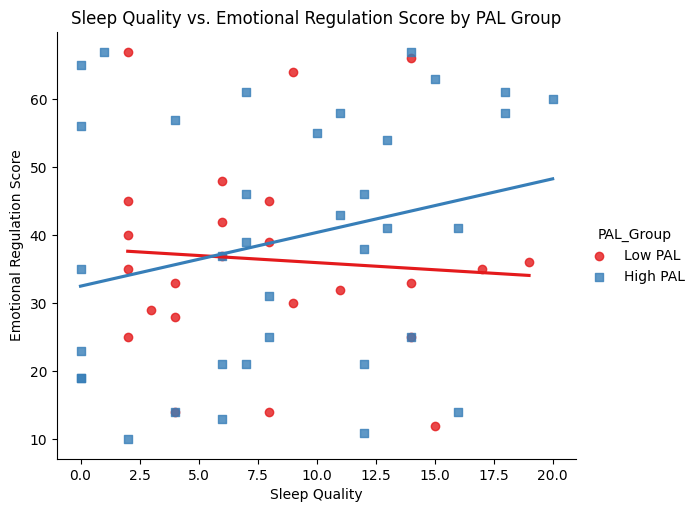

In [56]:
sns.lmplot(x="Sleep_Quality_Score", y="Emotion_Regulation_Score", hue='PAL_Group',
           data=df, aspect=1.2, ci=None, markers=["o", "s"],
           palette="Set1")
plt.title("Sleep Quality vs. Emotional Regulation Score by PAL Group")
plt.xlabel("Sleep Quality")
plt.ylabel("Emotional Regulation Score")
plt.show()

### Split By Gender

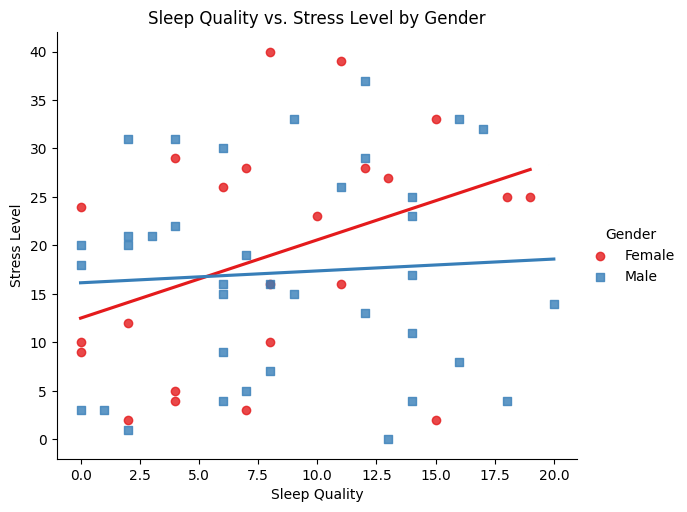

In [74]:
# Scatter plot with regression lines for each stress subgroup
sns.lmplot(x="Sleep_Quality_Score", y="Stress_Level", hue="Gender",
           data=df, aspect=1.2, ci=None, markers=["o", "s"],
           palette="Set1")
plt.title("Sleep Quality vs. Stress Level by Gender")
plt.xlabel("Sleep Quality")
plt.ylabel("Stress Level")
plt.show()

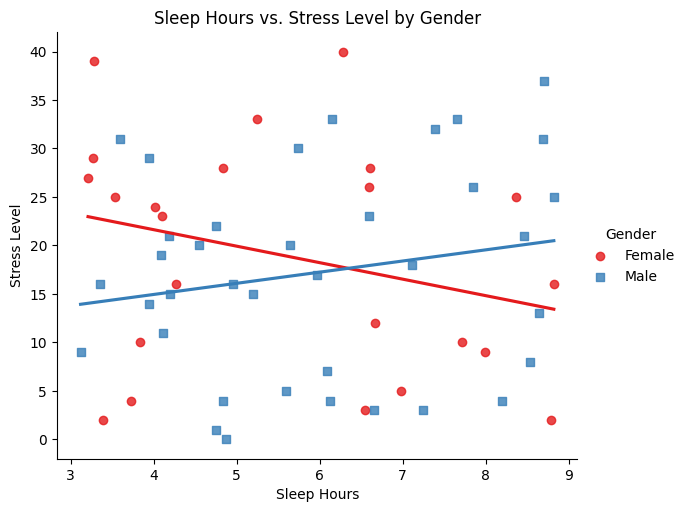

In [71]:
sns.lmplot(x="Sleep_Hours", y='Stress_Level', hue='Gender',
           data=df, aspect=1.2, ci=None, markers=["o", "s"],
           palette="Set1")
plt.title("Sleep Hours vs. Stress Level by Gender")
plt.xlabel("Sleep Hours")
plt.ylabel("Stress Level")
plt.show()

## Moderation Models

### Stress as a moderator for Sleep hours and PVT Reaction Time

In [76]:
# Model with interaction
model_pvt = smf.ols("PVT_Reaction_Time ~ Sleep_Hours * Stress_Level", data=df).fit()
print(model_pvt.summary())

                            OLS Regression Results                            
Dep. Variable:      PVT_Reaction_Time   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.933
Date:                Sat, 15 Feb 2025   Prob (F-statistic):              0.135
Time:                        13:09:26   Log-Likelihood:                -350.18
No. Observations:                  60   AIC:                             708.4
Df Residuals:                      56   BIC:                             716.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Centering

In [97]:
df['Sleep_Hours_centered'] = df['Sleep_Hours'] - df['Sleep_Hours'].mean()
df['Stress_Level_centered'] = df['Stress_Level'] - df['Stress_Level'].mean()

model_pvt_centered = smf.ols(
    "PVT_Reaction_Time ~ Sleep_Hours_centered * Stress_Level_centered",
    data=df
).fit()
print(model_pvt_centered.summary())

                            OLS Regression Results                            
Dep. Variable:      PVT_Reaction_Time   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.933
Date:                Sat, 15 Feb 2025   Prob (F-statistic):              0.135
Time:                        13:25:46   Log-Likelihood:                -350.18
No. Observations:                  60   AIC:                             708.4
Df Residuals:                      56   BIC:                             716.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

### Stress Level as a moderator for Sleep Quality and Emotional Regulation

In [96]:
model_emotion = smf.ols(
    "Emotion_Regulation_Score ~ Sleep_Quality_Score * Stress_Level",
    data=df
).fit()
print(model_emotion.summary())

                               OLS Regression Results                               
Dep. Variable:     Emotion_Regulation_Score   R-squared:                       0.115
Model:                                  OLS   Adj. R-squared:                  0.067
Method:                       Least Squares   F-statistic:                     2.415
Date:                      Sat, 15 Feb 2025   Prob (F-statistic):             0.0761
Time:                              13:24:02   Log-Likelihood:                -251.44
No. Observations:                        60   AIC:                             510.9
Df Residuals:                            56   BIC:                             519.3
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [100]:
df['Sleep_Quality_centered'] = df['Sleep_Quality_Score'] - df['Sleep_Quality_Score'].mean()
df['Stress_Level_centered'] = df['Stress_Level'] - df['Stress_Level'].mean()

model_pvt_centered = smf.ols(
    "Emotion_Regulation_Score ~ Sleep_Quality_centered * Stress_Level_centered",
    data=df
).fit()
print(model_pvt_centered.summary())

                               OLS Regression Results                               
Dep. Variable:     Emotion_Regulation_Score   R-squared:                       0.115
Model:                                  OLS   Adj. R-squared:                  0.067
Method:                       Least Squares   F-statistic:                     2.415
Date:                      Sat, 15 Feb 2025   Prob (F-statistic):             0.0761
Time:                              13:27:33   Log-Likelihood:                -251.44
No. Observations:                        60   AIC:                             510.9
Df Residuals:                            56   BIC:                             519.3
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### Subsetting by Stress Groups

In [101]:
# Subset the data for each stress group
df_low_stress = df[df['Stress_Group'] == 'Low Stress']
df_high_stress = df[df['Stress_Group'] == 'High Stress']

# Check the subgroup counts
print("Low Stress count:", len(df_low_stress))
print("High Stress count:", len(df_high_stress))

Low Stress count: 30
High Stress count: 30


In [106]:
# Fit the model for the Low Stress subgroup
model_low = smf.ols("Emotion_Regulation_Score ~ Sleep_Quality_centered", data=df_low_stress).fit()
print("Low Stress Group Model Summary:")
print(model_low.summary())

Low Stress Group Model Summary:
                               OLS Regression Results                               
Dep. Variable:     Emotion_Regulation_Score   R-squared:                       0.148
Model:                                  OLS   Adj. R-squared:                  0.118
Method:                       Least Squares   F-statistic:                     4.871
Date:                      Sat, 15 Feb 2025   Prob (F-statistic):             0.0357
Time:                              13:51:30   Log-Likelihood:                -125.64
No. Observations:                        30   AIC:                             255.3
Df Residuals:                            28   BIC:                             258.1
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [104]:
# Fit the model for the High Stress subgroup
model_high = smf.ols("PVT_Reaction_Time ~ Sleep_Hours", data=df_high_stress).fit()
print("High Stress Group Model Summary:")
print(model_high.summary())

High Stress Group Model Summary:
                            OLS Regression Results                            
Dep. Variable:      PVT_Reaction_Time   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     4.825
Date:                Sat, 15 Feb 2025   Prob (F-statistic):             0.0365
Time:                        13:50:30   Log-Likelihood:                -172.18
No. Observations:                  30   AIC:                             348.4
Df Residuals:                      28   BIC:                             351.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     423

In [27]:
df.head()


,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level,Stress_Group,SleepQuality_Group,BMI_Group
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33,High Stress,High Quality,High BMI
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37,High Stress,High Quality,Low BMI
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32,High Stress,High Quality,High BMI
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23,High Stress,High Quality,High BMI
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14,Low Stress,High Quality,High BMI
